In [8]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt


导入了必要的库

In [11]:
def read_dataset(fname):
    data = pd.read_csv(fname, index_col=0)
    data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    data['Sex'] = (data['Sex'] == 'male').astype('int')
    labels = data['Embarked'].unique().tolist()
    data['Embarked'] = data['Embarked'].apply(lambda n: labels.index(n))
    data = data.fillna(0)
    return data

定义了一个名为read_dataset的函数，用于读取指定文件名的 CSV 文件，进行数据预处理

In [14]:
train = read_dataset('./titanic/train.csv')

y = train['Survived'].values
X = train.drop(['Survived'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

调用read_dataset函数读取泰坦尼克号数据集，并将目标变量（是否存活）存储在y中，特征变量存储在X中。然后使用train_test_split将数据集划分为训练集和测试集，其中测试集占比为0.2。

In [16]:
depths = range(2, 15)
train_accuracies = []
test_accuracies = []

In [18]:
for max_depth in depths:
    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=max_depth)
    rf_clf.fit(X_train, y_train)
    train_preds = rf_clf.predict(X_train)
    test_preds = rf_clf.predict(X_test)
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

对于每个最大深度，创建一个随机森林分类器，设置树的数量为100，随机种子为42，以及当前的最大深度值。然后使用训练集进行训练，对训练集和测试集进行预测，并计算训练集和测试集的准确率。将准确率分别添加到对应的列表中。

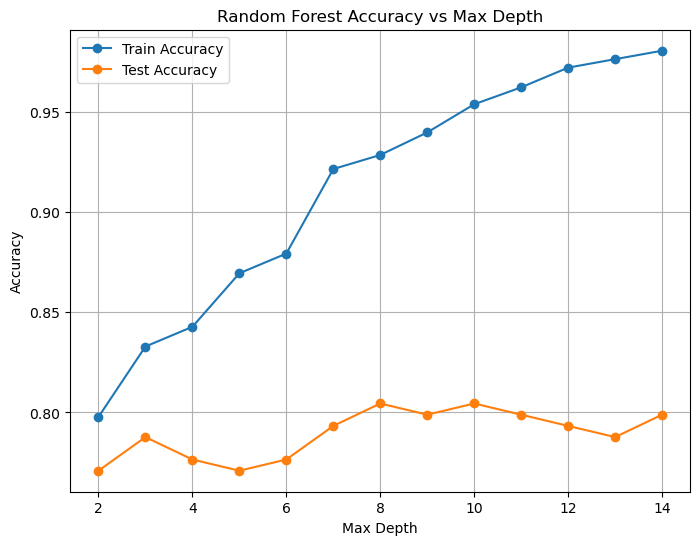

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(depths, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(depths, test_accuracies, marker='o', label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs Max Depth')
plt.legend()
plt.grid(True)
plt.show()

直观地观察不同最大深度对随机森林模型准确率的影响。